# Regresión logística para predicciones bancarias

En el ejemplo tenemos una entidad bancaria con un registro de usuarios que ha comprado o no su producto. Esto se define en la última comlumna del dataset `y`.

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
os.getcwd()

'/Users/carlosdavila/Developer/Anaconda-projects/Curso-ml-python/notebooks'

In [2]:
data = pd.read_csv("../../../GitHub/python-ml-course/datasets/bank/bank.csv", sep = ";")
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,...,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no
1,39,services,single,high.school,no,no,no,telephone,may,fri,...,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,...,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,no
3,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,...,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,no
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no


In [3]:
data.shape

(4119, 21)

In [4]:
data.columns.values

array(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'], dtype=object)

Transformaremos la variable que queremos predecir con la regresión logística en un vector numérico de ceros y unos.

In [5]:
data['y'] = (data['y']=="yes").astype(int)
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,...,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,0
1,39,services,single,high.school,no,no,no,telephone,may,fri,...,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,0
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,...,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,0
3,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,...,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,0
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,0


Por lo general, el nivel de estudios es una variable muy importante para el sector financiero a la hora de saber si un cliente le va a comprar un producto o no. En este caso, veamos los valores posibles de la variable `education`.

In [6]:
data['education'].unique()

array(['basic.9y', 'high.school', 'university.degree',
       'professional.course', 'basic.6y', 'basic.4y', 'unknown',
       'illiterate'], dtype=object)

Una operación que podemos hacer es agrupar los datos porque no necesitamos la información tan segmentada.

In [7]:
data['education'] = np.where(data['education'] == 'basic.4y', 'Basic', data['education'])
data['education'] = np.where(data['education'] == 'basic.6y', 'Basic', data['education'])
data['education'] = np.where(data['education'] == 'basic.9y', 'Basic', data['education'])

data['education'] = np.where(data['education'] == 'high.school', 'High School', data['education'])
data['education'] = np.where(data['education'] == 'professional.course', 'Professional Course', data['education'])
data['education'] = np.where(data['education'] == 'university.degree', 'University Degree', data['education'])
data['education'] = np.where(data['education'] == 'illiterate', 'Illiterate', data['education'])
data['education'] = np.where(data['education'] == 'unknown', 'Unknown', data['education'])
data['education'].unique()

array(['Basic', 'High School', 'University Degree', 'Professional Course',
       'Unknown', 'Illiterate'], dtype=object)

Podemos revisar el conteo de casos en los que el cliente compró el producto.

In [8]:
data['y'].value_counts()

0    3668
1     451
Name: y, dtype: int64

O la media de las variables numéricas.

In [9]:
data.groupby('y').mean()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
y,,,,,,,,,,
0,39.895311,219.40976,2.605780,982.763086,0.141767,0.240185,93.599677,-40.586723,3.802826,5175.502072
1,41.889135,560.78714,1.980044,778.722838,0.585366,-1.177384,93.417268,-39.786475,2.145448,5093.118625


* La franja de 40 años es clave a la hora de que un cliente compre o no
* El tiempo al último contacto con el cliente (`pdays`) es inferior en el caso de los compradores
* Se contactó menos veces con el cliente que compró (`campaign`). Habitualmente, si un cliente no compra tras 2 o 3 contactos, no se insiste más para que compre

Si agrupamos los datos por nivel de estudios

In [10]:
data.groupby('education').mean()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
education,,,,,,,,,,,
Basic,42.337124,253.898457,2.429732,978.815597,0.149472,0.237368,93.658600,-41.120552,3.775701,5174.133144,0.079610
High School,38.097720,258.534202,2.630836,958.022801,0.206298,-0.002497,93.564314,-40.995765,3.511732,5163.212595,0.105320
Illiterate,42.000000,146.000000,4.000000,999.000000,0.000000,-2.900000,92.201000,-31.400000,0.834000,5076.200000,0.000000
Professional Course,40.207477,278.816822,2.512150,958.211215,0.194393,0.163925,93.599630,-40.127664,3.701426,5167.595140,0.121495
University Degree,39.017405,247.707278,2.583070,947.900316,0.207278,-0.009731,93.499109,-39.830063,3.547132,5163.023180,0.130538
Unknown,42.826347,267.281437,2.538922,939.700599,0.263473,-0.074251,93.637455,-39.487425,3.410174,5151.260479,0.155689


Text(0, 0.5, 'Frecuencia de compra del producto')

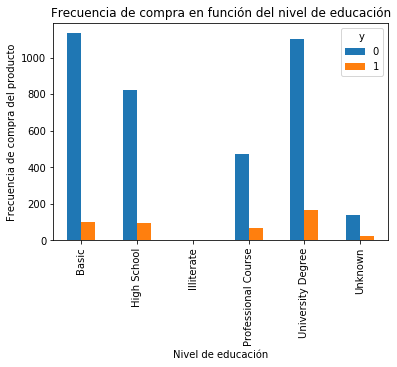

In [11]:
%matplotlib inline
pd.crosstab(data.education, data.y).plot(kind="bar")
plt.title("Frecuencia de compra en función del nivel de educación")
plt.xlabel("Nivel de educación")
plt.ylabel("Frecuencia de compra del producto")

Podemos añadir como columna apilada para ver si influye el estado civil de la persona.

Text(0, 0.5, 'Proporción de clientes')

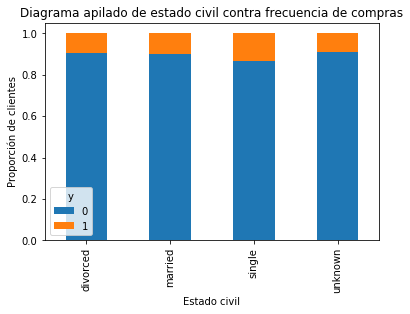

In [12]:
table = pd.crosstab(data.marital, data.y)
# Le añado la proporción para que sea más sencillo de comparar
table.div(table.sum(1).astype(float), axis = 0).plot(kind="bar", stacked=True)
plt.title('Diagrama apilado de estado civil contra frecuencia de compras')
plt.xlabel('Estado civil')
plt.ylabel('Proporción de clientes')

Vemos que el estado civil no marca especialmente la frecuencia de compra, por lo que no servirá como variable para predecir.

También podemos estudiar si el mes o el día de la semana afectan en la compra.

Text(0, 0.5, 'Frecuencia de compra del producto')

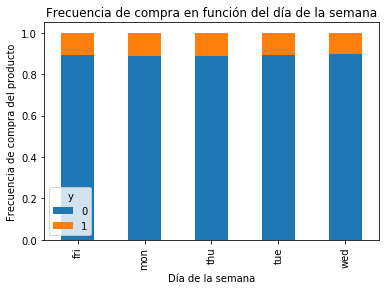

In [13]:
%matplotlib inline
table = pd.crosstab(data.day_of_week, data.y)
table.div(table.sum(1).astype(float), axis = 0).plot(kind="bar", stacked=True)
plt.title("Frecuencia de compra en función del día de la semana")
plt.xlabel("Día de la semana")
plt.ylabel("Frecuencia de compra del producto")

Text(0, 0.5, 'Frecuencia de compra del producto')

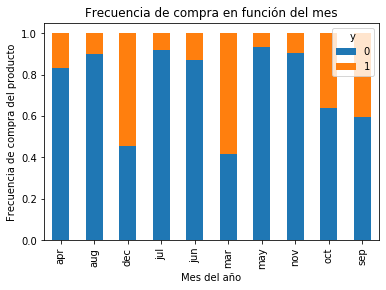

In [14]:
%matplotlib inline
table = pd.crosstab(data.month, data.y)
table.div(table.sum(1).astype(float), axis = 0).plot(kind="bar", stacked=True)
plt.title("Frecuencia de compra en función del mes")
plt.xlabel("Mes del año")
plt.ylabel("Frecuencia de compra del producto")

Parece que el mes del año puede ser un buen predictor. Lo corroboramos haciendo el plot sin apilar para comprobar si lo que ocurre es que hay pocos datos.

Text(0, 0.5, 'Frecuencia de compra del producto')

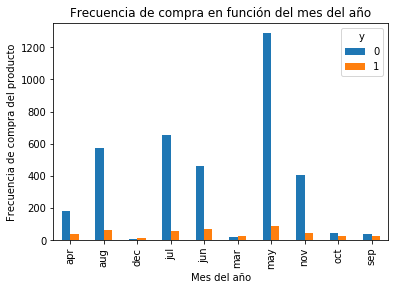

In [15]:
%matplotlib inline
pd.crosstab(data.month, data.y).plot(kind="bar")
plt.title("Frecuencia de compra en función del mes del año")
plt.xlabel("Mes del año")
plt.ylabel("Frecuencia de compra del producto")

Vemos que hay ciertos meses en los que hay más rechazos, por lo que se puede asumir que son los meses en los que hay campañas. Por lo tanto, podemos descartar la variable mes como predictora.

Por último, exploramos la edad.

Text(0, 0.5, 'Cliente')

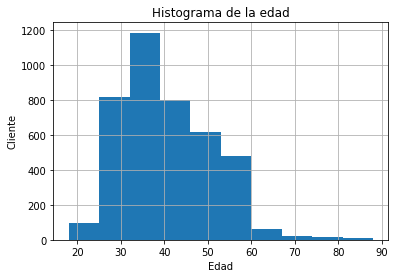

In [16]:
%matplotlib inline
data.age.hist()
plt.title('Histograma de la edad')
plt.xlabel('Edad')
plt.ylabel('Cliente')

Vemos que la mayoría de clientes está en la franja de 30 a 40 años.

Podemos cruzar con la variable de compra o rechazo (`y`).

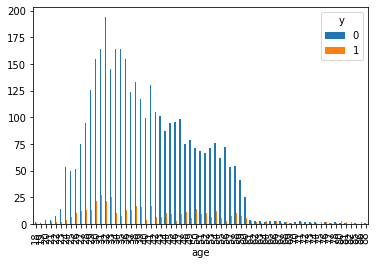

In [17]:
%matplotlib inline
pd.crosstab(data.age, data.y).plot(kind="bar")

* Parece que la franja de 30 a 40 años es más probable hacer una inversión.
* Cuando se alcanza una cierta edad no interesa la inversión (interesa la pensión)

Otra buena variable puede ser `poutcome`, que define el éxito o fracaso de venta en campañas anteriores.

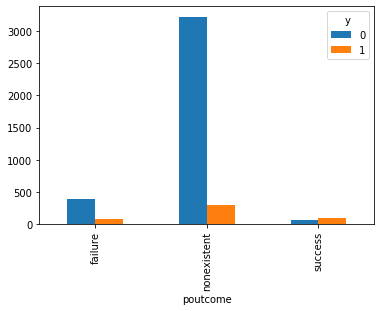

In [18]:
pd.crosstab(data.poutcome, data.y).plot(kind='bar')

Se puede concluir que:
* Si antes ha dicho que no es más probable que vuelva a negar
* Si antes ha comprado es más probable que vuelva a comprar

## Conversión de las variables categóricas a dummies

Antes de aplicar el modelo logístico tendremos que convertir la variables categóricas que nos interesen en variables dummies

In [19]:
categories = ['job', 'marital','education', 'housing','loan',
              'contact', 'month', 'day_of_week','poutcome']

for category in categories:
    cat_list = 'cat' + '_' + category
    cat_dummies = pd.get_dummies(data[category], prefix=category)
    data = data.join(cat_dummies)

Y borramos las columnas categóricas que ya no me hacen falta.

In [20]:
data_vars = data.columns.values.tolist()

In [21]:
data_vars[:10]

['age',
 'job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'day_of_week']

In [22]:
to_keep = [v for v in data_vars if v not in categories]
to_keep = [v for v in to_keep if v not in ['default']]

In [23]:
len(to_keep) , len(data_vars)

(59, 69)

In [24]:
bank_data = data[to_keep]
bank_data.columns.values

array(['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed', 'y',
       'job_admin.', 'job_blue-collar', 'job_entrepreneur',
       'job_housemaid', 'job_management', 'job_retired',
       'job_self-employed', 'job_services', 'job_student',
       'job_technician', 'job_unemployed', 'job_unknown',
       'marital_divorced', 'marital_married', 'marital_single',
       'marital_unknown', 'education_Basic', 'education_High School',
       'education_Illiterate', 'education_Professional Course',
       'education_University Degree', 'education_Unknown', 'housing_no',
       'housing_unknown', 'housing_yes', 'loan_no', 'loan_unknown',
       'loan_yes', 'contact_cellular', 'contact_telephone', 'month_apr',
       'month_aug', 'month_dec', 'month_jul', 'month_jun', 'month_mar',
       'month_may', 'month_nov', 'month_oct', 'month_sep',
       'day_of_week_fri', 'day_of_week_mon', 'day_of_week_thu',
       'd

In [25]:
bank_data.head()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,...,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
0,30,487,2,999,0,-1.8,92.893,-46.2,1.313,5099.1,...,0,0,1,0,0,0,0,0,1,0
1,39,346,4,999,0,1.1,93.994,-36.4,4.855,5191.0,...,0,0,1,0,0,0,0,0,1,0
2,25,227,1,999,0,1.4,94.465,-41.8,4.962,5228.1,...,0,0,0,0,0,0,1,0,1,0
3,38,17,3,999,0,1.4,94.465,-41.8,4.959,5228.1,...,0,0,1,0,0,0,0,0,1,0
4,47,58,1,999,0,-0.1,93.200,-42.0,4.191,5195.8,...,0,0,0,1,0,0,0,0,1,0


Ahora separamos el dataset para la regresión.

In [26]:
bank_data_vars = bank_data.columns.values.tolist()
Y = ['y']
X = [v for v in bank_data_vars if v not in Y]

### Selección de rasgos para el modelo

De esta forma determinaremos qué variables serán más significativas para nuestro modelo.

In [27]:
n = 12

In [28]:
from sklearn import datasets
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

In [29]:
lr = LogisticRegression()

In [30]:
rfe = RFE(lr, n)
rfe = rfe.fit(bank_data[X], bank_data[Y].values.ravel())

/Users/carlosdavila/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/carlosdavila/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/carlosdavila/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/carlosdavila/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/carlosdavila/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Defau

/Users/carlosdavila/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/carlosdavila/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/carlosdavila/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/carlosdavila/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/carlosdavila/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Defau

Ahora podemos comprobar los resultados obtenidos.

En primer lugar, las variables que han sido seleccionadas para el modelo.

In [31]:
print(rfe.support_)

[False False False False  True False False False  True False False False
 False False False  True False False False False  True False False False
 False False False False False False False False False False False False
 False False False False False False  True  True  True  True  True False
  True False False False False False False  True False  True]


El ránking de estas variables para el modelo:
* Tomarán ranking = 1 las primeras 12 variables con mayor peso en el modelo
* El resto se ordenarán en función de lo buenas o malas que sean

In [32]:
print(rfe.ranking_)

[33 40 22 43  1 18 30 27  1 36  4 14  9 17 13  1 10 39  2  3  1 45 20 42
 32 47 41 16 46 23 38  8 25 11 12 19  7 31 24  5 34 26  1  1  1  1  1 21
  1 44 37 28 35 29 15  1  6  1]


Lo podemos ver todo junto para que sea más fácil, haciendo un zip y pasándolo como lista, como ya hicimos antes.

In [33]:
z = zip(bank_data_vars, rfe.support_, rfe.ranking_)

In [34]:
list(z)

[('age', False, 33),
 ('duration', False, 40),
 ('campaign', False, 22),
 ('pdays', False, 43),
 ('previous', True, 1),
 ('emp.var.rate', False, 18),
 ('cons.price.idx', False, 30),
 ('cons.conf.idx', False, 27),
 ('euribor3m', True, 1),
 ('nr.employed', False, 36),
 ('y', False, 4),
 ('job_admin.', False, 14),
 ('job_blue-collar', False, 9),
 ('job_entrepreneur', False, 17),
 ('job_housemaid', False, 13),
 ('job_management', True, 1),
 ('job_retired', False, 10),
 ('job_self-employed', False, 39),
 ('job_services', False, 2),
 ('job_student', False, 3),
 ('job_technician', True, 1),
 ('job_unemployed', False, 45),
 ('job_unknown', False, 20),
 ('marital_divorced', False, 42),
 ('marital_married', False, 32),
 ('marital_single', False, 47),
 ('marital_unknown', False, 41),
 ('education_Basic', False, 16),
 ('education_High School', False, 46),
 ('education_Illiterate', False, 23),
 ('education_Professional Course', False, 38),
 ('education_University Degree', False, 8),
 ('education_Un

In [35]:
columns = ['previous','euribor3m','job_management','job_technician', 'month_aug', 'month_dec', 'month_jul', 'month_jun', 'month_mar', 'month_nov', 'day_of_week_wed','poutcome_nonexistent']

Puede verse como las conclusiones extraídas del EDA se contradicen bastante con los resultados obtenidos.

Sin embargo, también ocurre que el modelo de datos sea fallido pues está siendo fuertemente marcado por las variables temporales.

En cualquier caso, nuestro modelo sería el siguiente.

In [36]:
X = bank_data[columns]
Y = bank_data['y']

### *Ejercicio

Hacer un bucle que automatice la selección de modelos a partir del zip anteior.

**Solución 1:**

In [37]:
var, support = zip(*zip(bank_data_vars, rfe.support_))
cols_1 = []

for v in var:
    if (support[var.index(v)] == True):
        cols_1.append(v)

print(cols_1)
if (cols_1 == columns):
    print('\nExito al realizar el ejercicio')

['previous', 'euribor3m', 'job_management', 'job_technician', 'month_aug', 'month_dec', 'month_jul', 'month_jun', 'month_mar', 'month_nov', 'day_of_week_wed', 'poutcome_nonexistent']

Exito al realizar el ejercicio


**Solución 2:**

In [38]:
var, rank = zip(*zip(bank_data_vars, rfe.ranking_))
cols_2 = []
for v in var:
    if (rank[var.index(v)] == 1):
        cols_2.append(v)
print(cols_2)
if (cols_1 == cols_2 == columns):
    print('\nExito al realizar el ejercicio')

['previous', 'euribor3m', 'job_management', 'job_technician', 'month_aug', 'month_dec', 'month_jul', 'month_jun', 'month_mar', 'month_nov', 'day_of_week_wed', 'poutcome_nonexistent']

Exito al realizar el ejercicio


## Implementación del modelo en python con statsmodel.api

In [39]:
import statsmodels.api as sm

In [40]:
logit_model = sm.Logit(Y, X)
result = logit_model.fit()

Optimization terminated successfully.
         Current function value: 0.293164
         Iterations 7


In [41]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                 4119
Model:                          Logit   Df Residuals:                     4107
Method:                           MLE   Df Model:                           11
Date:                Tue, 17 Sep 2019   Pseudo R-squ.:                  0.1514
Time:                        12:03:26   Log-Likelihood:                -1207.5
converged:                       True   LL-Null:                       -1422.9
Covariance Type:            nonrobust   LLR p-value:                 1.788e-85
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
previous                -0.1458      0.070     -2.069      0.039      -0.284      -0.008
euribor3m               -0.6269      0.038    -16.457      0.000      -0.702      -0.552
job_management          -0.2857      0.216     -1.324      0.186      -0.709       0.137
job_technician           0.0432      0.145      0.298      0.766      -0.241       0.328
month_aug                0.7261      0.174      4.175      0.000       0.385       1.067
month_dec                1.2267      0.447      2.742      0.006       0.350       2.103
month_jul                1.0960      0.190      5.761      0.000       0.723       1.469
month_jun                1.1262      0.175      6.452      0.000       0.784       1.468
month_mar                1.6811      0.315      5.340      0.000       1.064       2.298
month_nov                0.4495      0.195      2.303      0.021       0.067       0.832
day_of_week_wed         -0.0913      0.139     -0.659      0.510      -0.363       0.180
poutcome_nonexistent    -0.8115      0.121     -6.700      0.000      -1.049      -0.574
========================================================================================
"""

En los resultados de la regresión podemos ver:
* `Dep. Variable`: La variable a predecir
* `No. Observations`: la cantidad de datos que tenemos
* `Df.Residuals`: Número de residuos, que se obtiene de `observaciones - Df. Model - 1`
* `Df Model`: los grados de libertad del modelo, equivale a `Variables predictoras - 1`
* `Converged`: si `True` es que ha convergido rápidamente (en este caso 7 iteraciones)
* `Pseudo R-squ.`: el pseudo R^2 o error estándar
* `Log-Likelihood`: el logaritmo del entorno
* `LL-Null`: La nulificación del entorno
* `coef`: coeficiente para la variable en el modelo. En algunos podemos ver que la variable en el modelo es prácticamente `0`
* `Std.Err.`: desviación estádar
* `z`: z-valor de cada variable
* `P>|z|`: p valor asociado al `z-valor`, que indica la significancia de la variable en el modelo. Corresponde con el contraste de hipótesis de cada variable en el modelo. Vemos que `job_technician`, `job_management` y `day_of_the_week` son variables a descartar según este parámetro.
* `[0.025 0.975]`: el intervalo de confianza. Cuando pasa por `0` nos indica que la variable es descartable

Si aplicamos el modelo usando la librería de `sklearn` veremos que no calcula los z-valores, pero por contra, si que lleva a cabo tareas más complejas como la predicción, cálculo de rasgos y otras funcionalidades avanzadas que no trae `statsmodels`. Esto los convierte en complementarios:

* `sklearn` nos servirá para crear el modelo
* Con `statsmodel` se puede explorar y afinar el modelo

### Implementación del modelo en Python con scikit-learn

In [42]:
from sklearn import linear_model

In [43]:
logit_model = linear_model.LogisticRegression()
logit_model.fit(X,Y)

/Users/carlosdavila/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

Si le pedimos el R^2 vemos que es bastante alto, por lo que el modelo es bastante bueno (en comparación con cualquier otro que pudíeramos hacer).

In [44]:
logit_model.score(X,Y)

0.8975479485311969

Si calculamos la media sobre el vector de la variable `Y`, veremos que el resultado se corresponde con el porcentaje o proporción de personas que si compran (10,9%).

In [45]:
Y.mean()

0.10949259529011895

Si por defecto dijéramos que el cliente no va a comprar (si predecimos 0), el porcentaje de acierto sería el complementario al anterior. Es decir:

In [46]:
1-Y.mean()

0.8905074047098811

Al comparar este resultado con el `score` de nuestro modelo, vemos que este ha mejorado porcentualmente la capacidad de acierto de la predicción.

In [47]:
- (1-Y.mean()-logit_model.score(X,Y) )

0.007040543821315803

Para mejorar la eficacia del modelo podríamos eliminar algunas columnas, dividir el conjunto de datos en conjuntos de testing y training.

Los coeficientes indican los cambios en escala logarítmica, es decir, en el cociente de probabilidades, por cada unidad de cambio de la variable.

Normalmente, con valores cercanos a cero y tan solo 7 iteraciones, los resultados que obtendríamos tendrían que ser siempre los mismos. Sin embargo, el método de Newton- Raphson no es exacto, por lo que nos podrían dar resultados diferentes.

In [48]:
pd.DataFrame(list(zip(X.columns, np.transpose(logit_model.coef_))))

,0,1
0,previous,[0.5308392468398129]
1,euribor3m,[-0.5635462103897865]
2,job_management,[-0.26964107534162274]
3,job_technician,[0.1463255020359922]
4,month_aug,[0.7170713965121742]
5,month_dec,[1.2743802272752018]
6,month_jul,[1.006790241585916]
7,month_jun,[1.0891317519630876]
8,month_mar,[1.6548038845182234]
9,month_nov,[0.5028311666686498]


Por ejemplo, el coeficiente de la variable `previous` es algo más de 0.5. Esto significa que, si la variable `previous` incrementa en 1 unidad, el logaritmo del cociente de probabilidades se incrementará en 0.5. Y, por tanto, la probabilidad de compra incrementará de forma acorde. La columna de coeficientes siempre la tendremos que leer como el cociente del logaritmo de probabilidades:

$log\frac{P_i}{1-P_i}$

Por tanto, de la tabla anteiror, podemos inducir que, las variables que más influyen a la hora de realizar una compra son:
* `month_mar`:cuando contactamos en este mes, la probabilidad de compra aumenta en un 163%
* algunas variables como `job_management` cuentan negativamente. En el caso del `euribor3m` por cada punto que sube, las probabilidades de venta disminuyen algo más de un 50%
* No suele ser adecuado dejar que el factor estacional influya tanto en el modelo

Vemos que los resultados obtenidos de `statsmodel` y `sklearn` difieren, pero en pequeña medida. Salvo en algunos casos, en los que la diferencia es sensible. Por tanto, tendremos que pasar a hacer un análisi exahustivo de las variables para validar el modelo.

## Validación del modelo logístico

### División en conjuntos testing y training para evitar el overfiting

In [49]:
from sklearn.model_selection import train_test_split

Tendremos que suministrar los conjuntos X e Y y el paquete nos devolverá los subconjuntos automáticamente.

In [50]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = .3, random_state = 0) # con random_state fijamos la semilla aleatoria

Ahora repetimos el modelo.

In [51]:
lm = linear_model.LogisticRegression()
lm.fit(X_train, Y_train)

/Users/carlosdavila/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

Recordemos que la ecuación que sustenta el modelo lleva a cabo la predicción de las probabilidades.

Entonces, una vez que el modelo se crea, necesitamos definir un umbral (thredshold) a partir del cual estas probabilidades van a ser clasificadas en dos categorías.

Cuando lo hacemos, si:

* `Pi` < umbral : se clasifica como `0`
* `Pi` > umbral : se clasifica como `1`

Calcularemos la probabilidad estandar del modelo. Por tanto, nos dará tanto la probabilidad de estar seguros de obtener una respuesta negariva como positiva del conjunto de datos (testing).

Habitualmente:

$Y_p = \begin{cases} 0& si\ p\leq0.5 \\ 1&si\ p > 0.5 \end{cases}$

In [52]:
probs = lm.predict_proba(X_test)

In [53]:
probs

array([[0.94056117, 0.05943883],
       [0.87274283, 0.12725717],
       [0.93740932, 0.06259068],
       ...,
       [0.6801034 , 0.3198966 ],
       [0.97325019, 0.02674981],
       [0.55154517, 0.44845483]])

En el resultado vemos:
* En la primera columna las probabildades (cómo de seguro estoy de lo que estoy diciendo)
* En la segunda columna la probabilidad del valor del salida o respuesta (compra o no compra)
    * Si >= 0.5 se cataloga como positivo (1)
    * Si < 0.5 se cataloga como negativo (0)

Esta será una de las herramientas fundamentales para poder decidir. 

También podemos utilizar el modelo para llevar a cabo la predicción (la clase de salida) en base a la predicción del modelo, pasando el conjunto de test que es el que estamos validando.

In [54]:
prediction = lm.predict(X_test)
prediction

array([0, 0, 0, ..., 0, 0, 0])

Vemos que los resultados que aparecen se corresponden con la clasificación que debía obtenerse de `probs`.

Sin embargo, podríamos elegir un umbral (también cutoff) diferente. Especialmente en datasets tan desviado como este, en el que solo hay un 10% de éxito, nos intersará hacerlo de esta manera.

$\varepsilon\in (0,1) = \begin{cases} 0& si\ p\leq\varepsilon \\ 1&si\ p > \varepsilon \end{cases}$

Dependiendo de lo cercano que sea a 1 será más restrictivo y viceversa.

En nuestro caso, que el porcentaje de éxito es de un 10%, podemos definir un umbral en 0.1 para dar un mejor resultado que el original.

En este caso, le estamos dando al banco un margen de personas mayor al que poder venderle su producto.

In [55]:
prob = probs[:,1]
prob_df = pd.DataFrame(prob)
threshold = 0.1
prob_df['prediction'] = np.where(prob_df[0]>threshold, 1, 0)
prob_df.head()

,0,prediction
0,0.059439,0
1,0.127257,1
2,0.062591,0
3,0.057383,0
4,0.055050,0


Para comprobar los totales de cada grupo hacemos una `crosstab`

In [56]:
pd.crosstab(prob_df.prediction, columns = 'count')

col_0,count
prediction,
0,846
1,390


In [57]:
print('390 es un ' + str(390/len(prob_df)*100) + '% del total')

390 es un 31.55339805825243% del total


Si el umbral que hemos definido resulta muy "agresivo", podemos definir otro para presentarlo como alternativa.

In [58]:
threshold = 0.15
prob_df['prediction'] = np.where(prob_df[0]>threshold, 1, 0)
pd.crosstab(prob_df.prediction, columns = 'count')

col_0,count
prediction,
0,896
1,340


In [59]:
print('390 es un ' + str(340/len(prob_df)*100) + '% del total')

390 es un 27.508090614886733% del total


In [60]:
threshold = 0.05
prob_df['prediction'] = np.where(prob_df[0]>threshold, 1, 0)
pd.crosstab(prob_df.prediction, columns = 'count')

col_0,count
prediction,
0,423
1,813


In [61]:
print('813 es un ' + str(813/len(prob_df)*100) + '% del total')

813 es un 65.77669902912622% del total


Ahora podemos comprobar la eficacia del modelo con el paquete `metrics` de `sklearn`.

In [62]:
from sklearn import metrics

In [63]:
metrics.accuracy_score(Y_test, prediction)

0.9037216828478964

Vemos que en la predicción original, en el 90% de los casos coincide el potencial comprador con el que ya era comprador.

Si antes habíamos conseguido una eficacia de algo más del 89,75%, al dividir en conjunto de testing y training hemos mejorado la eficacia del modelo.

## Validación cruzada

In [64]:
from sklearn.model_selection import cross_val_score

In [65]:
scores = cross_val_score(linear_model.LogisticRegression(), X, Y, scoring="accuracy", cv=10)

/Users/carlosdavila/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/carlosdavila/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/carlosdavila/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/carlosdavila/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/carlosdavila/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Defau

In [66]:
scores

array([0.90556901, 0.88834951, 0.90776699, 0.8907767 , 0.89805825,
       0.89805825, 0.88349515, 0.89320388, 0.89781022, 0.89294404])

In [67]:
scores.mean()

0.8956032003035543

Podemos concluir que el modelo generaliza bien la información suministrada para ser entrenado.

## Matrices de Confusión y Curvas ROC para validar el modelo

In [68]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.3, random_state = 0)

In [69]:
lm = linear_model.LogisticRegression()
lm.fit(X_train,Y_train)

/Users/carlosdavila/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [70]:
probs = lm.predict_proba(X_test)
prob = probs[:,1]
prob_df = pd.DataFrame(prob)

threshold = 0.1

prob_df['prediction'] = np.where(prob_df[0]>= threshold,1,0)
prob_df['actual'] = list(Y_test) # casteamos con list para que el vector pierda los índices antiguos y se una correctamente al df
prob_df.head()

,0,prediction,actual
0,0.059439,0,0
1,0.127257,1,0
2,0.062591,0,0
3,0.057383,0,0
4,0.055050,0,0


Ahora elaboramos la matriz de confusión. Esta variará según el umbral que hayamos elegido.

In [71]:
confusion_matrix = pd.crosstab(prob_df.prediction, prob_df.actual)
confusion_matrix

actual,0,1
prediction,,
0,806,40
1,308,82


In [72]:
TN = confusion_matrix[0][0]
TP = confusion_matrix[1][1]
FN = confusion_matrix[0][1]
FP = confusion_matrix[1][0]

Calculamos la sensibilidad

In [73]:
sens = TP/(TP+FN)
sens

0.21025641025641026

Calculamos la especificidad

In [74]:
espc_1 = 1-TN/(TN+FP)
espc_1

0.047281323877068515

Este procedimiento lo podemos hacer para probar diferentes umbrales para el modelo a través de un bucle.

In [75]:
thresholds = [0.04,0.05,0.07,0.1,0.12,0.15,0.18,0.20,0.25]
sensitivities = [1]
especifities_1 = [1]

for t in thresholds:
    prob_df['prediction'] = np.where(prob_df[0]>= t,1,0)
    prob_df['actual'] = list(Y_test) # casteamos con list para que el vector pierda los índices antiguos y se una correctamente al df
    prob_df.head()

    confusion_matrix = pd.crosstab(prob_df.prediction, prob_df.actual)
    TN = confusion_matrix[0][0]
    TP = confusion_matrix[1][1]
    FP = confusion_matrix[0][1]
    FN = confusion_matrix[1][0]

    sens = TP/(TP+FN)
    sensitivities.append(sens)
    espc_1 = 1-TN/(TN+FP)
    especifities_1.append(espc_1)
    
sensitivities.append(0)
especifities_1.append(0)

In [76]:
sensitivities

[1,
 0.9508196721311475,
 0.860655737704918,
 0.680327868852459,
 0.6721311475409836,
 0.6721311475409836,
 0.6229508196721312,
 0.5,
 0.4344262295081967,
 0.39344262295081966,
 0]

In [77]:
especifities_1

[1,
 0.7809694793536804,
 0.6355475763016158,
 0.28186714542190305,
 0.2764811490125674,
 0.27558348294434465,
 0.23698384201077194,
 0.12477558348294437,
 0.09156193895870735,
 0.07091561938958713,
 0]

Con los valores ploteamos la curva ROC

In [78]:
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Curva ROC')

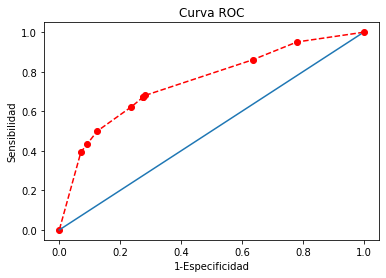

In [79]:
plt.plot(especifities_1,sensitivities, marker="o",linestyle = "--",color="r")
x=[i*0.01 for i in range(100)]
y=[i*0.01 for i in range(100)]
plt.plot(x,y)
plt.xlabel("1-Especificidad")
plt.ylabel("Sensibilidad")
plt.title("Curva ROC")

### Conclusiones

* El modelo tiene margen de mejora, pues lo ideal sería que se dibujara una línea recta desde el 0 hasta el 1 en la sensibilidad y que 1-Especificidad = 1
* La diagonal es un modelo de clasificación aleatoria en el que existe la misma posibilidad de acertar que de fallar con la clasificación
* Si la curva se dibujara por debajo de la diagonal, nuestro modelo sería peor que la clasificación aleatoria (diagonal)
* Si tuviésemos más de un modelo, y por tanto, más de una curva, cuanto mayor sea el área encerrada bajo la curva, mejor es el modelo

Ahora podemos calcular el área bajo la curva gracias a la librería `metrics` de `sklearn`.

In [80]:
from sklearn import metrics

In [81]:
from ggplot import *

Obtengo la sensitividad y la especificidad del paquete `statsmodel`

In [82]:
espec_1, sensit, _ = metrics.roc_curve(Y_test,prob)
df = pd.DataFrame({
    "1-Especificidad":espec_1,
    "Sensibilidad": sensit
})
df.head()

,1-Especificidad,Sensibilidad
0,0.000000,0.000000
1,0.000000,0.008197
2,0.000000,0.032787
3,0.001795,0.032787
4,0.001795,0.049180


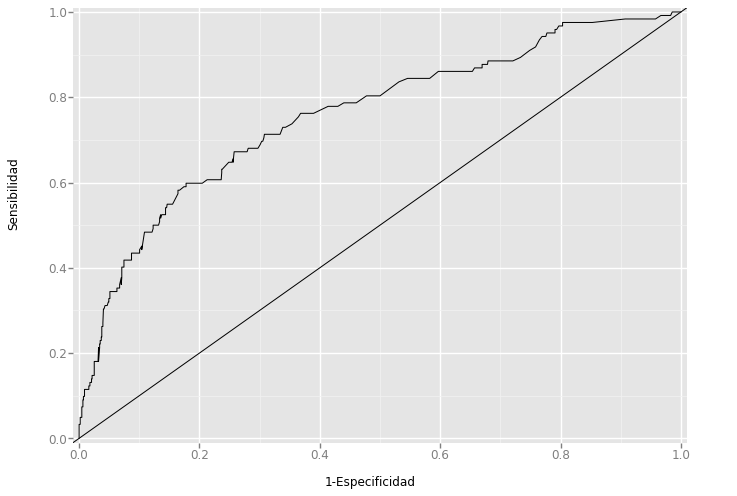

<ggplot: (-9223372029309198511)>

In [86]:
(ggplot(df, aes(x = "1-Especificidad", y = "Sensibilidad"))+
 geom_line() + 
 xlim(-0.01,1.01) +
 ylim(-0.01,1.01) +
 geom_abline(lintype="dashed"))

A continuación calculamos el área de la siguiente manera.

In [87]:
auc = metrics.auc(espec_1, sensit) # area under curve
auc

0.7581084262883715

In [91]:
df.head()

,1-Especificidad,Sensibilidad
0,0.000000,0.000000
1,0.000000,0.008197
2,0.000000,0.032787
3,0.001795,0.032787
4,0.001795,0.049180


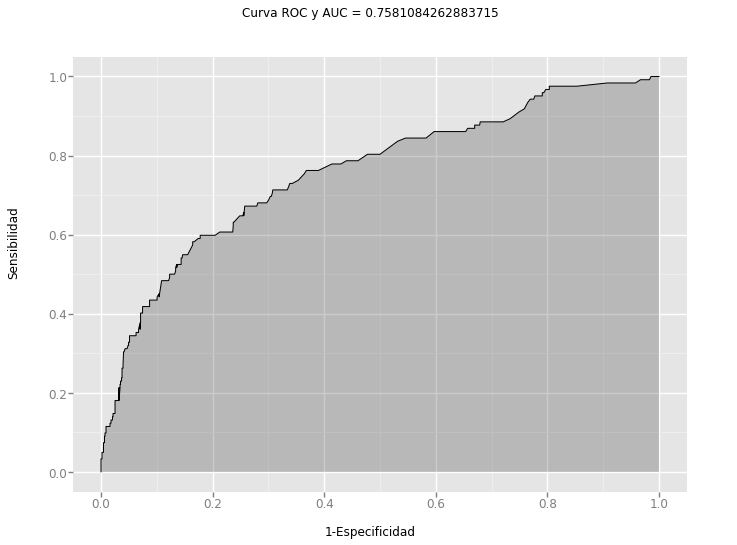

<ggplot: (-9223372029308712942)>

In [93]:
(ggplot(df, aes(x = "1-Especificidad", y = "Sensibilidad")) + 
 geom_area(alpha=0.25) + 
 geom_line(aes(y = "Sensibilidad")) + 
 ggtitle("Curva ROC y AUC = %s"%str(auc)))